In [92]:
# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2

figsize = (15, 3.5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pandas and Dataset Inspection

## An Example Problem

**Let's assume we want to [estimate real-estate prices in Taiwan](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)**

<center><img src="assets/taiwan-tea-house.jpg" width=75%></center>


## The Data File

**Data for this problem is available (in csv format) from the `data` folder**

On Linux/OS X or on the [Windows Powershell](https://learn.microsoft.com/en-us/powershell/scripting/overview?view=powershell-7.3) check it by running this:

In [93]:
!ls data

real_estate.csv


On a classic Windows command prompt you can run instead:

In [94]:
!dir data

real_estate.csv


* csv stand for "Comma Separated Values"
* It's a simple text-based data format

## Pandas

**You can read csv files**

* Using notepad or any text editor
* Using excel (which imports them into worksheets)
* ...Or using Python

**In particular, we will rely on the [pandas](https://pandas.pydata.org/) package**

`pandas` is a python data-analysis library

* It can be used to load, inspect, and manipulate data
* With a focus on _tables_ (called "dataframes" and series)

`pandas` is imported with:

In [95]:
import pandas as pd

## Loading the Data

**We can then load a csv file with `read_csv`**

In [96]:
import os
fname = os.path.join('data', 'real_estate.csv')
data = pd.read_csv(fname, sep=',')
data.head()

,house age,dist to MRT,#stores,latitude,longitude,price per area
0,14.8,393.2606,6,24.96172,121.53812,7.6
1,17.4,6488.0210,1,24.95719,121.47353,11.2
2,16.0,4066.5870,0,24.94297,121.50342,11.6
3,30.9,6396.2830,1,24.94375,121.47883,12.2
4,16.5,4082.0150,0,24.94155,121.50381,12.8


* We use `os.path.join` to obtain a path that works on both Win and \*nix
* `read_csv` returns a `DataFrame` object
* The `head` methods returns a `DataFrame` with the first 5 rows
* Dataframes are displayed as html tables by Jupyter

## Indexing a Dataframe

**The indexing operator for `DataFrame` objects is heavily overloaded**

We can access a whole column by its _name_:

In [97]:
data['house age']

0      14.8
1      17.4
2      16.0
3      30.9
4      16.5
       ... 
409     0.0
410     0.0
411    35.4
412    37.2
413    10.8
Name: house age, Length: 414, dtype: float64

* Every column in a `DataFrame` is an object of the `Series` class

## Indexing a Dataframe

**Every `DataFrame` and `Series` has a special field called an _index_**

In the visualization, it's the first column (in bold font, with no name)

In [98]:
data.head()

,house age,dist to MRT,#stores,latitude,longitude,price per area
0,14.8,393.2606,6,24.96172,121.53812,7.6
1,17.4,6488.0210,1,24.95719,121.47353,11.2
2,16.0,4066.5870,0,24.94297,121.50342,11.6
3,30.9,6396.2830,1,24.94375,121.47883,12.2
4,16.5,4082.0150,0,24.94155,121.50381,12.8


It is analogous to a [primary key](https://en.wikipedia.org/wiki/Primary_key) in a database

* Every rows has an unique index value
* ...Which is used to identify and quickly access to the row

## Indexing a Dataframe

**We can access the index with the `index` attribute**

In [99]:
data.index

RangeIndex(start=0, stop=414, step=1)

* Our `DataFrame` has a numeric index

**We can access a row by its index value using the `loc` property**

In [100]:
data.loc[3]

house age           30.90000
dist to MRT       6396.28300
#stores              1.00000
latitude            24.94375
longitude          121.47883
price per area      12.20000
Name: 3, dtype: float64

* The results is once again a `Series` object

## Indexing a Dataframe

**For a `Series` that corresponds to a row**

...The index is the sequence of column names

In [101]:
data.loc[3].loc['house age']

30.9

* Therefore, we can use `loc` to retrieve a given column value
* We can even do both operations at once, by passing a tuple to `loc`

In [102]:
data.loc[3, 'house age']

30.9

## Indexing a Dataframe

**Pandas supports also _positional_ access**

To see this, let's consider again the `Series` for row 3

In [103]:
r3 = data.loc[3]
r3

house age           30.90000
dist to MRT       6396.28300
#stores              1.00000
latitude            24.94375
longitude          121.47883
price per area      12.20000
Name: 3, dtype: float64

We can access an element by its position using the `iloc` property

In [104]:
r3.iloc[1] # this is dist to MRT

6396.283

## Indexing a Dataframe

**Positional access might be useful**

...Since the "normal" index is attached to a row _even if it moves around_

* For example, if we reorder the rows in a `DataFrame`
* The index values _move together_ with the rows:

In [105]:
first_rows = data.loc[[2, 1, 5, 3, 4]]
first_rows

,house age,dist to MRT,#stores,latitude,longitude,price per area
2,16.0,4066.587,0,24.94297,121.50342,11.6
1,17.4,6488.021,1,24.95719,121.47353,11.2
5,32.0,1156.777,0,24.94935,121.53046,12.8
3,30.9,6396.283,1,24.94375,121.47883,12.2
4,16.5,4082.015,0,24.94155,121.50381,12.8


* In most cases, index access is more convenient
* For some algorithms the sequence matters and we need positional access

## Indexing a Dataframe

**We can use just the `[]` operator (without `loc` or `iloc`)**

...Pandas tries to understand which of the two we need:

In [106]:
print(r3[3])
print(r3['latitude'])

24.94375
24.94375


If there is an abiguity, we get an error:

In [107]:
data[3]

KeyError: 3

## A Possible Problem Statement

**Now that we know better about `pandas`, let's look again at the data**

In [108]:
data.head()

,house age,dist to MRT,#stores,latitude,longitude,price per area
0,14.8,393.2606,6,24.96172,121.53812,7.6
1,17.4,6488.0210,1,24.95719,121.47353,11.2
2,16.0,4066.5870,0,24.94297,121.50342,11.6
3,30.9,6396.2830,1,24.94375,121.47883,12.2
4,16.5,4082.0150,0,24.94155,121.50381,12.8


* The first four columns contain quantities that easy to estimate
* ...But that's not true for the last one!

**Obtaining price information requires actual houses to be sold and bought**

* Therefore, it might be useful to _learn a machine model_
* ...That can _estimate the price_ based on the easily available information

## Using Histograms

**Since our goal is roughly defined, it's _a good idea to inspect the dataset_**

We will start by using _histograms_, i.e. plots with:

- On the x-axis: values for one attribute
- On the y-axis: occurrency count in the dataset

They are useful to display the _distribution_ of each column

**Some comments:**

* Continuous attributes are typically discretized (i.e. binned) first
* The counts can be normalized to obtain frequencies

**Histograms can be built directly from `pandas`**

...By using the [hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) method.

* `matplotlib` is used behind the scens and can be employed to add details
* ...Or as an alernative, if we need a more complex plot

## Dataset Inspection via Histograms

**Let's inspect the "house age" attribute**

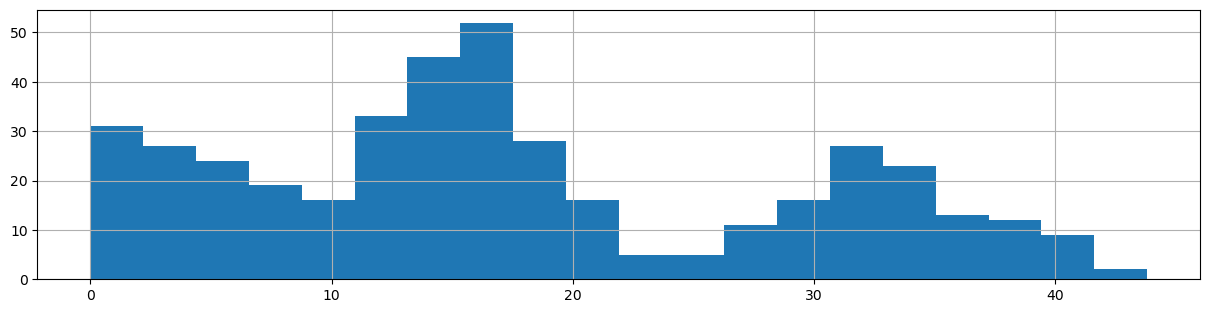

In [109]:
data['house age'].hist(figsize=figsize, bins=20);

**What can you say about that?**

## Using Histograms

**Let's inspect the "house age" attribute**

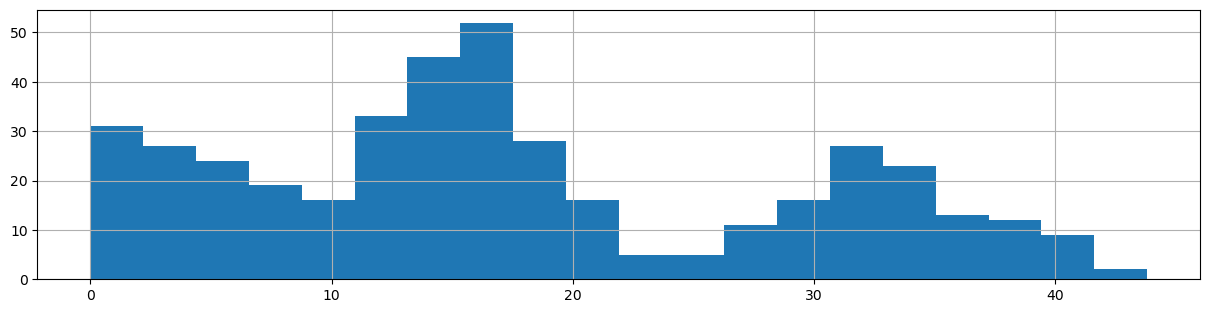

In [110]:
data['house age'].hist(figsize=figsize, bins=20);

* There seems to be two main clusters, roughly normally distributed
* Lower age values are roughly uniformly likely

**Now, try building histograms for the other columns**

## Dataset Inspection via Cartesian Plots

**We can obtain information about the distribution of each column**

...By using statistics. For example we can call:

In [58]:
data.describe()

,house age,dist to MRT,#stores,latitude,longitude,price per area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


* Statistics are a very compact way to convey information
* ...But they are also less rich than using a histogram

## Dataset Inspection via Cartesian Plots

**The third tool we'll use for dataset inspection**

...Is given by Cartesian plots, which have:

- On the x-axis: the index value
- On the y-axis: the value of one attribute
- Consecutive points are connected by a line

**A few comments**

* Cartesian plot are extremely useful with time series
* ...Where the index represents time, or a sequence number

They are far less useful with non-sequential data

**That said, we are going to use them all the same**

## Using Cartesian Plots

**Let's inspect the "house age" attribute**

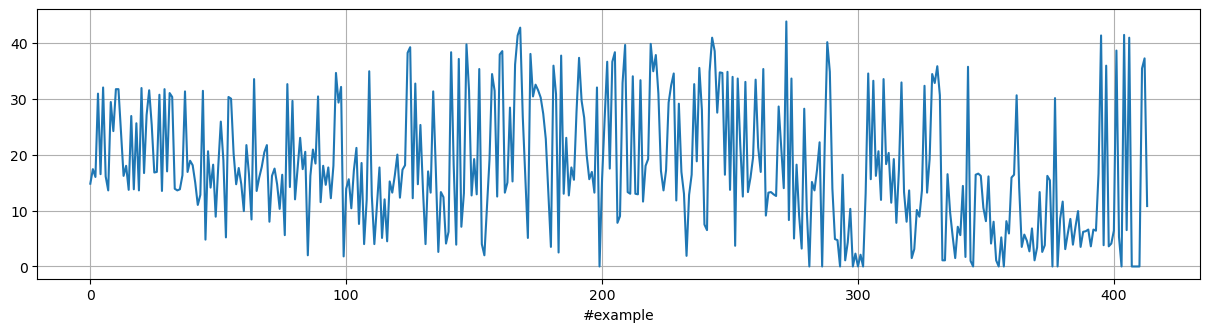

In [59]:
data['house age'].plot(xlabel='#example', grid=':', figsize=figsize);

* As expected, there is no significant patter

**Try making Cartesian plots for all attributes**

## Dataset Inspection via Scatter Plots

**The fourth tool we'll use for dataset inspection**

...Is given by scatter plots, which have:

- On the x-axis: the values for one attribute
- On the y-axis: the values for anotehr attribute (usually the target)
- Points in scatter plot are _not_ connected by a line

**Some comments:**

* These are great for the visual identification of correlations
* By looking at the shape of the "cloud of points"
* ...It is possible to get insight on _how_ the attributes are connected

## Using Scatter Plots

**Let's inspect how "house age" and the target are linked**

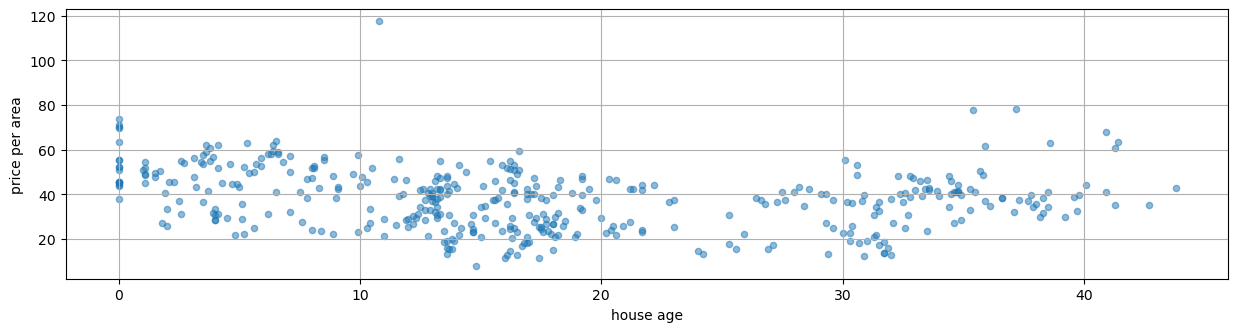

In [79]:
data.plot.scatter(x='house age', y='price per area', figsize=figsize, grid=':', alpha=0.5);

* There does not seem to be a strong correlation here

**Try building some scatter plots w.r.t. the target**

## Addendum: Using Boxplots

**For categorical attributes, a [box plot](https://en.wikipedia.org/wiki/Box_plot) may be more appropriate** 

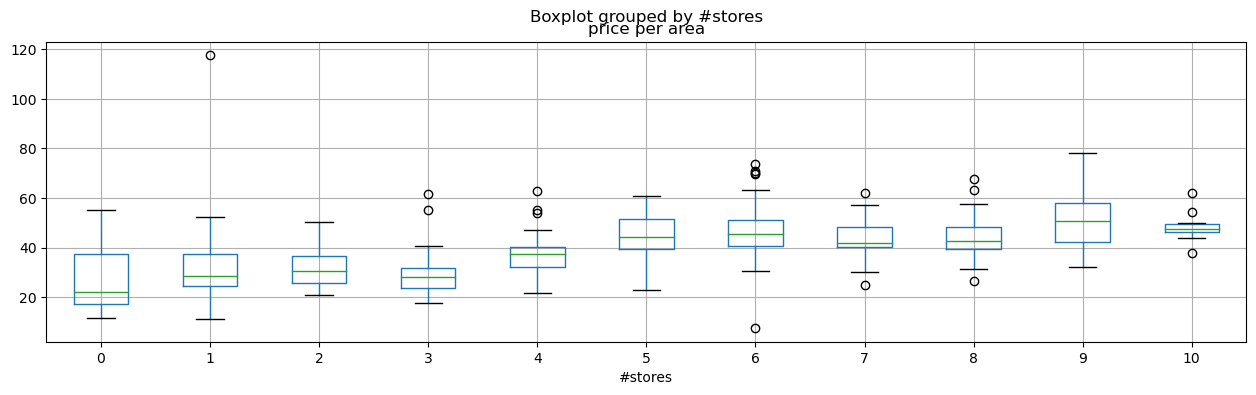

In [91]:
data.boxplot(by='#stores', column='price per area', figsize=(15, 4));

* We have one box per value of an attribute
* On the $y$ axis, we have a second attribute (usually the target)

## Addendum: Using Boxplots

**For categorical attributes, a [box plot](https://en.wikipedia.org/wiki/Box_plot) may be more appropriate** 

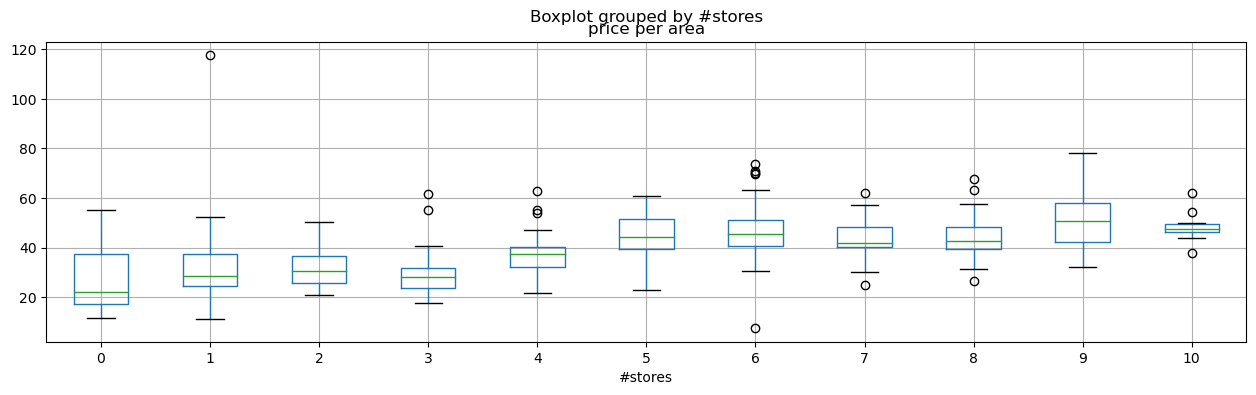

In [91]:
data.boxplot(by='#stores', column='price per area', figsize=(15, 4));

* The box boundaries are the 1st and 3rd quartile
* The green line represents the mean

## Addendum: Using Boxplots

**For categorical attributes, a [box plot](https://en.wikipedia.org/wiki/Box_plot) may be more appropriate** 

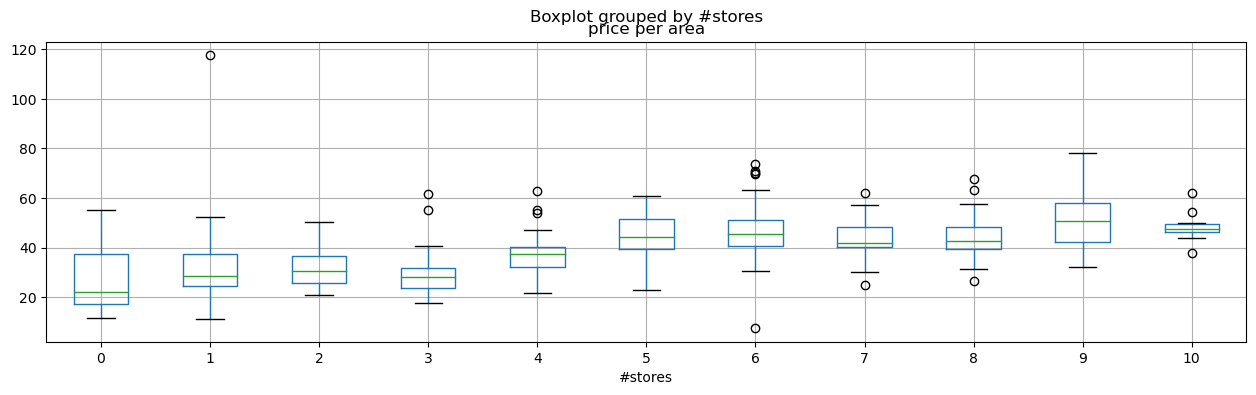

In [91]:
data.boxplot(by='#stores', column='price per area', figsize=(15, 4));

* The "whiskers" extend for 1.5 the inter-quartile range
* Values outside the whiskers are plotted directly

## Addendum: Using Boxplots

**For categorical attributes, a [box plot](https://en.wikipedia.org/wiki/Box_plot) may be more appropriate** 

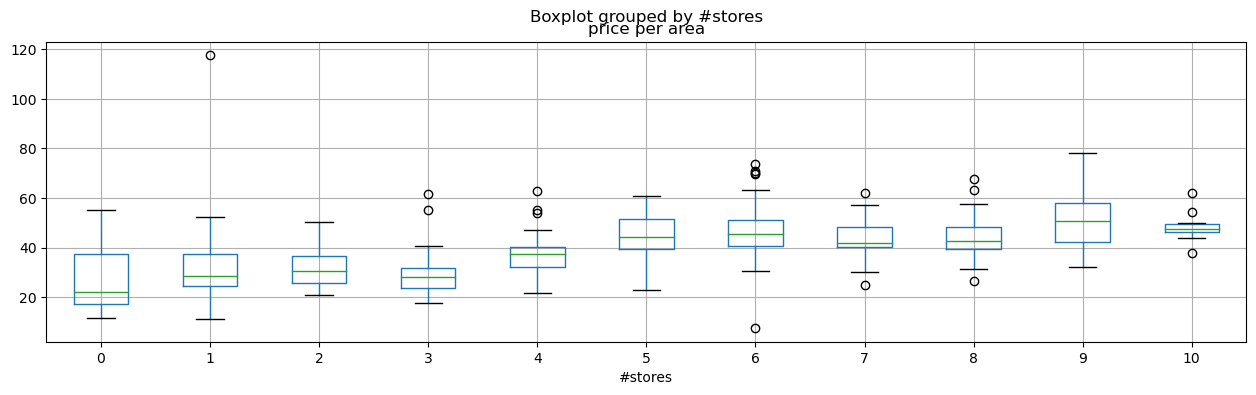

In [91]:
data.boxplot(by='#stores', column='price per area', figsize=(15, 4));

* Box plots are great to see how the _distribution_ of a $y$ depends on $x$
* They can be used with continuous attributes, if we first discretize them

## Conclusions and Take-Home Messages

**Inspecting a new dataset is _very_ important**

* We can get a sense of the dataset
* We can spot the main challenges we will have to face
* ...Including potentially some critical issues (inadequate data)
* It may prevent us from making some mistakes later
* ...And it will allow us some sanity check over the results

**Of course, these benefits depend a lot on your experience**

* Perhaps some of you already got idea by looking at the plots
* ...But for now the important thing is just to keep them in mind